## 1.1. 普通最小二乘法
该方法使用 X 的奇异值分解来计算最小二乘解。如果X是一个size为(n, p)的矩阵，设n>= p,则该方法的复杂度为O(np^2)

`LinearRegression`  
sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

Automatically created module for IPython interactive environment
Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


([], <a list of 0 Text yticklabel objects>)

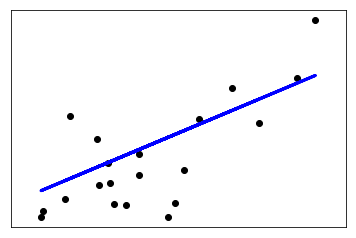

In [ ]:
#Linear Regression Example
%matplotlib inline
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

#plt.show()

In [9]:
from sklearn import linear_model

In [11]:
reg = linear_model.LinearRegression()
reg.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.coef_

array([ 0.5,  0.5])

## 涉及
- 奇异值分解
- 奇异矩阵
- 多重共线性
- mean_squared_error, r2_score

## 1.2. 岭回归
α的值越大，收缩量越大，这样系数对共线性的鲁棒性也更强

`Ridge`  
sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)

### 广义交叉验证
RidgeCV 通过内置的 Alpha 参数的交叉验证来实现岭回归。 该对象与 GridSearchCV 的使用方法相同，只是它默认为 Generalized Cross-Validation(广义交叉验证 GCV)，这是一种有效的留一验证方法（LOO-CV）

`RidgeCV`  
sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False)

In [13]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
print(reg)
reg.fit ([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 
print(reg.coef_)
print(reg.intercept_)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
[ 0.34545455  0.34545455]
0.136363636364


Automatically created module for IPython interactive environment


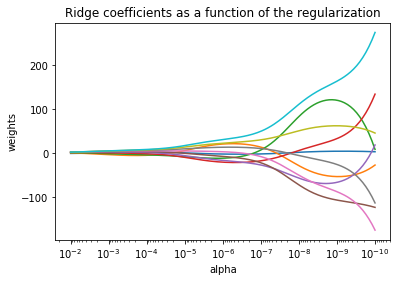

In [14]:
#Plot Ridge coefficients as a function of the regularization
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [16]:
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
print(reg)
print(reg.alpha_)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)
0.1


## 1.3. Lasso
The Lasso 是估计稀疏系数的线性模型。 它在一些情况下是有用的，因为它倾向于使用具有较少参数值的情况，有效地减少给定解决方案所依赖变量的数量。 因此，Lasso 及其变体是压缩感知领域的基础。 在一定条件下，它可以恢复一组非零权重的精确集

`Lasso`  
sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [17]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])
reg.predict([[1, 1]])

print(reg)
print(reg.predict([[1, 1]]))

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
[ 0.8]


### 基于 L1 的特征选取

In [20]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target
X.shape

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 3)

### 设置正则化参数

使用交叉验证
- alpha 参数控制估计系数的稀疏度。
- LassoCV
- LassoLarsCV

对于具有许多线性回归的高维数据集， LassoCV 最常见。 
LassoLarsCV 在寻找 alpha 参数值上更具有优势，
如果样本数量与特征数量相比非常小时，通常 LassoLarsCV 比 LassoCV 要快。

基于信息标准的模型选择
- LassoLarsIC

### 与 SVM 的正则化参数的比较
alpha 和 SVM 的正则化参数``C`` 之间的等式关系是 alpha = 1 / C 或者 alpha = 1 / (n_samples * C) ，并依赖于估计器和模型优化的确切的目标函数。

## 1.4. 多任务 Lasso
MultiTaskLasso 是一个估计多元回归稀疏系数的线性模型： y 是一个 (n_samples, n_tasks) 的二维数组，其约束条件和其他回归问题（也称为任务）是一样的，都是所选的特征值。

`MultiTaskLasso`  
sklearn.linear_model.MultiTaskLasso(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, random_state=None, selection='cyclic')

![MultiTaskLasso](MultiTaskLasso.png)

## 1.5. 弹性网络
`弹性网络`是一种使用 L1， L2 范数作为先验正则项训练的线性回归模型。 这种组合允许学习到一个只有少量参数是非零稀疏的模型，就像 Lasso 一样，但是它仍然保持 一些像 Ridge 的正则性质。我们可利用 l1_ratio 参数控制 L1 和 L2 的凸组合。

弹性网络在很多特征互相联系的情况下是非常有用的。Lasso 很可能只随机考虑这些特征中的一个，而弹性网络更倾向于选择两个。

在实践中，Lasso 和 Ridge 之间权衡的一个优势是它允许在循环过程（Under rotate）中继承 Ridge 的稳定性。

`ElasticNet`  
sklearn.linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)

`ElasticNetCV` 类可以通过交叉验证来设置参数alpha和l1_ratio。  
sklearn.linear_model.ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute=’auto’, max_iter=1000, tol=0.0001, cv=None, copy_X=True, verbose=0, n_jobs=1, positive=False, random_state=None, selection=’cyclic’)


## 1.6. 多任务弹性网络
MultiTaskElasticNet 是一个对多回归问题估算稀疏参数的弹性网络: Y 是一个二维数组，形状是 (n_samples,n_tasks)。 其限制条件是和其他回归问题一样，是选择的特征，也称为 tasks 。

- MultiTaskElasticNet 类中的实现采用了坐标下降法求解参数。
- MultiTaskElasticNetCV 中可以通过交叉验证来设置参数 alpha （ \alpha ） 和 l1_ratio （ \rho ） 。

`MultiTaskElasticNet`  
sklearn.linear_model.MultiTaskElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, random_state=None, selection='cyclic)

`MultiTaskElasticNetCV`  
sklearn.linear_model.MultiTaskElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, max_iter=1000, tol=0.0001, cv=None, copy_X=True, verbose=0, n_jobs=1, random_state=None, selection='cyclic')


## 1.7. 最小角回归
最小角回归 （LARS） 是对高维数据的回归算法， 由 Bradley Efron, Trevor Hastie, Iain Johnstone 和 Robert Tibshirani 开发完成。 LARS 和逐步回归很像。在每一步，它寻找与响应最有关联的 预测。当有很多预测有相同的关联时，它没有继续利用相同的预测，而是在这些预测中找出应该等角的方向。

LARS的优点:

- 当 p >> n，该算法数值运算上非常有效。(例如当维度的数目远超点的个数)
- 它在计算上和前向选择一样快，和普通最小二乘法有相同的运算复杂度。
- 它产生了一个完整的分段线性的解决路径，在交叉验证或者其他相似的微调模型的方法上非常有用。
- 如果两个变量对响应几乎有相等的联系，则它们的系数应该有相似的增长率。因此这个算法和我们直觉 上的判断一样，而且还更加稳定。
- 它很容易修改并为其他估算器生成解，比如Lasso。

LARS 的缺点:

- 因为 LARS 是建立在循环拟合剩余变量上的，所以它对噪声非常敏感。这个问题，在 2004 年统计年鉴的文章由 Weisberg 详细讨论。
- LARS 模型可以在 Lars ，或者它的底层实现 lars_path 中被使用。


`Lars`  
sklearn.linear_model.Lars(fit_intercept=True, verbose=False, normalize=True, precompute='auto', n_nonzero_coefs=500, eps=2.2204460492503131e-16, copy_X=True, fit_path=True, positive=False)

`lars_path`  
sklearn.linear_model.lars_path(X, y, Xy=None, Gram=None, max_iter=500, alpha_min=0, method='lar', copy_X=True, eps=2.2204460492503131e-16, copy_Gram=True, verbose=0, return_path=True, return_n_iter=False, positive=False)

## 1.8. LARS Lasso
LassoLars 是一个使用 LARS 算法的 lasso 模型，不同于基于坐标下降法的实现，它可以得到一个精确解，也就是一个关于自身参数标准化后的一个分段线性解。

该算法和逐步回归非常相似，但是它没有在每一步包含变量，它估计的参数是根据与 其他剩余变量的联系来增加的。

在 LARS 的解中，没有给出一个向量的结果，而是给出一条曲线，显示参数向量的 L1 范式的每个值的解。 完全的参数路径存在 coef_path_ 下。它的 size 是 (n_features, max_features+1)。 其中第一列通常是全 0 列。

`LassoLars`
sklearn.linear_model.LassoLars(alpha=1.0, fit_intercept=True, verbose=False, normalize=True, precompute='auto', max_iter=500, eps=2.2204460492503131e-16, copy_X=True, fit_path=True, positive=False)

## 涉及
- 逐步回归

## 1.9. 正交匹配追踪法（OMP）
OrthogonalMatchingPursuit (正交匹配追踪法)和 orthogonal_mp使用了 OMP 算法近似拟合了一个带限制的线性模型，该限制影响于模型的非 0 系数(例：L0 范数)。

`OrthogonalMatchingPursuit`  
sklearn.linear_model.OrthogonalMatchingPursuit(n_nonzero_coefs=None, tol=None, fit_intercept=True, normalize=True, precompute='auto')

`orthogonal_mp`  
sklearn.linear_model.orthogonal_mp(X, y, n_nonzero_coefs=None, tol=None, precompute=False, copy_X=True, return_path=False, return_n_iter=False)

## 1.10. 贝叶斯回归
贝叶斯回归可以用于在预估阶段的参数正则化: 正则化参数的选择不是通过人为的选择，而是通过手动调节数据值来实现。

贝叶斯回归有如下几个优点:

- 它能根据已有的数据进行改变。
- 它能在估计过程中引入正则项。

贝叶斯回归有如下缺点:

- 它的推断过程是非常耗时的。

###  贝叶斯岭回归
`BayesianRidge`  
sklearn.linear_model.BayesianRidge(n_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06, compute_score=False, fit_intercept=True, normalize=False, copy_X=True, verbose=False)

In [23]:
from sklearn import linear_model
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
reg.fit(X, Y)

reg.predict ([[1, 0.]])

reg.coef_

array([ 0.49999993,  0.49999993])

###  ARDRegression

ARDRegression（主动相关决策理论）和 `BayesianRidge`非常相似，但是会导致一个更加稀疏的权重 w

`ARDRegression`  
sklearn.linear_model.ARDRegression(n_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06, compute_score=False, threshold_lambda=10000.0, fit_intercept=True, normalize=False, copy_X=True, verbose=False)

## 1.11. logistic 回归
ogistic 回归，虽然名字里有 “回归” 二字，但实际上是解决分类问题的一类线性模型。在某些文献中，logistic 回归又被称作 logit 回归，maximum-entropy classification（MaxEnt，最大熵分类），或 log-linear classifier（对数线性分类器）。该模型利用函数 logistic function 将单次试验（single trial）的可能结果输出为概率。

scikit-learn 中 logistic 回归在 LogisticRegression 类中实现了二分类（binary）、一对多分类（one-vs-rest）及多项式 logistic 回归，并带有可选的 L1 和 L2 正则化。

### 优化算法
在 LogisticRegression 类中实现了这些优化算法: “liblinear”， “newton-cg”， “lbfgs”， “sag” 和 “saga”。

- “liblinear” 应用了坐标下降算法（Coordinate Descent, CD），并基于 scikit-learn 内附的高性能 C++ 库 LIBLINEAR library 实现。不过 CD 算法训练的模型不是真正意义上的多分类模型，而是基于 “one-vs-rest” 思想分解了这个优化问题，为每个类别都训练了一个二元分类器。因为实现在底层使用该求解器的 LogisticRegression 实例对象表面上看是一个多元分类器。 sklearn.svm.l1_min_c 可以计算使用 L1 罚项时 C 的下界，以避免模型为空（即全部特征分量的权重为零）。

- “lbfgs”, “sag” 和 “newton-cg” solvers （求解器）只支持 L2 惩罚项，对某些高维数据收敛更快。这些求解器的参数 `multi_class`设为 “multinomial” 即可训练一个真正的多项式 logistic 回归，其预测的概率比默认的 “one-vs-rest” 设定更为准确。

- “sag” 求解器基于平均随机梯度下降算法（Stochastic Average Gradient descent）。在大数据集上的表现更快，大数据集指样本量大且特征数多。

- “saga” 求解器是 “sag” 的一类变体，它支持非平滑（non-smooth）的 L1 正则选项 penalty="l1" 。因此对于稀疏多项式 logistic 回归 ，往往选用该求解器。

- For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and‘saga’ are faster for large ones.
- For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
- ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas‘liblinear’ and ‘saga’ handle L1 penalty.

总结：  
“saga” 一般都是最佳的选择

`LogisticRegression`  
sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

`LogisticRegressionCV`  
sklearn.linear_model.LogisticRegressionCV(Cs=10, fit_intercept=True, cv=None, dual=False, penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, n_jobs=1, verbose=0, refit=True, intercept_scaling=1.0, multi_class='ovr', random_state=None)

LogisticRegressionCV 对 logistic 回归 的实现内置了交叉验证（cross-validation），可以找出最优的参数 C 。”newton-cg”， “sag”， “saga” 和 “lbfgs” 在高维数据上更快，因为采用了热启动（warm-starting）。 在多分类设定下，若 multi_class 设为 “ovr” ，会为每类求一个最佳的 C 值；若 multi_class 设为 “multinomial” ，会通过交叉熵损失（cross-entropy loss）求出一个最佳 C 值。

## 1.12. 随机梯度下降,SGD
随机梯度下降是拟合线性模型的一个简单而高效的方法。在`样本量`和`特征数``很大`时尤为有用。 方法 partial_fit 可用于 online learning （在线学习）或基于 out-of-core learning （外存的学习）

SGDClassifier 和 SGDRegressor 分别用于拟合分类问题和回归问题的线性模型，可使用不同的（凸）损失函数，支持不同的罚项。 例如，设定 loss="log" ，则 SGDClassifier 拟合一个逻辑斯蒂回归模型，而 loss="hinge" 拟合线性支持向量机（SVM）。


`SGDClassifier`  
sklearn.linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, class_weight=None, warm_start=False, average=False, n_iter=None)

`SGDRegressor`  
sklearn.linear_model.SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, warm_start=False, average=False, n_iter=None)

## 1.13. Perceptron,感知器
Perceptron 是适用于大规模学习的一种简单算法。默认情况下：

- 不需要设置学习率（learning rate）。
- 不需要正则化处理。
- 仅使用错误样本更新模型。

最后一点表明使用合页损失（hinge loss）的感知机比 SGD 略快，所得模型更稀疏。

`Perceptron`  
sklearn.linear_model.Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=None, tol=None, shuffle=True, verbose=0, eta0=1.0, n_jobs=1, random_state=0, class_weight=None, warm_start=False, n_iter=None)

## 1.14. Passive Aggressive Algorithms,被动攻击算法
被动攻击算法是大规模学习的一类算法。和感知机类似，它也不需要设置学习率，不过比感知机多出一个正则化参数 C 。

对于分类问题， PassiveAggressiveClassifier 可设定 loss='hinge' （PA-I）或 loss='squared_hinge' （PA-II）。   
`PassiveAggressiveClassifier`  
sklearn.linear_model.PassiveAggressiveClassifier(C=1.0, fit_intercept=True, max_iter=None, tol=None, shuffle=True, verbose=0, loss='hinge', n_jobs=1, random_state=None, warm_start=False, class_weight=None, average=False, n_iter=None)

对于回归问题， PassiveAggressiveRegressor 可设置 loss='epsilon_insensitive' （PA-I）或 loss='squared_epsilon_insensitive' （PA-II）。    
`PassiveAggressiveRegressor`  
sklearn.linear_model.PassiveAggressiveRegressor(C=1.0, fit_intercept=True, max_iter=None, tol=None, shuffle=True, verbose=0, loss='epsilon_insensitive', epsilon=0.1, random_state=None, warm_start=False, average=False, n_iter=None)

## 1.15. 稳健回归（Robustness regression）: 处理离群点（outliers）和模型错误
稳健回归（robust regression）特别适用于回归模型包含损坏数据（corrupt data）的情况，如离群点或模型中的错误。

### 各种使用场景与相关概念
处理包含离群点的数据时牢记以下几点:
- 离群值在 X 上还是在 y 方向上
- 离群点的比例 vs. 错误的量级（amplitude）
- 离群点的数量很重要，离群程度也同样重要。

稳健拟合（robust fitting）的一个重要概念是崩溃点（breakdown point），即拟合模型（仍准确预测）所能承受的离群值最大比例。

注意，在高维数据条件下（ n_features 大），一般而言很难完成稳健拟合，很可能完全不起作用。

### 预测器的选择
Scikit-learn提供了三种稳健回归的预测器（estimator）: `RANSAC` ， `Theil Sen` 和 `HuberRegressor`

- HuberRegressor 一般快于 RANSAC 和 Theil Sen ，除非样本数很大，即 n_samples >> n_features 。 这是因为 RANSAC 和 Theil Sen 都是基于数据的较小子集进行拟合。但使用默认参数时， Theil Sen 和 RANSAC 可能不如 HuberRegressor 鲁棒。
- RANSAC 比 Theil Sen 更快，在样本数量上的伸缩性（适应性）更好。
- RANSAC 能更好地处理y方向的大值离群点（通常情况下）。
- Theil Sen 能更好地处理x方向中等大小的离群点，但在高维情况下无法保证这一特点。

实在决定不了的话，请使用 RANSAC

### RANSAC： 随机抽样一致性算法（RANdom SAmple Consensus）
随机抽样一致性算法（RANdom SAmple Consensus， RANSAC）利用全体数据中局内点（inliers）的一个随机子集拟合模型。

RANSAC 是一种非确定性算法，以一定概率输出一个可能的合理结果，依赖于迭代次数（参数 max_trials ）。这种算法主要`解决线性或非线性回归问题`，在`计算机视觉摄影测绘领域`尤为流行。

算法从全体样本输入中分出一个局内点集合，全体样本可能由于测量错误或对数据的假设错误而含有噪点、离群点。最终的模型仅从这个局内点集合中得出。

### Theil-Sen 预估器: 广义中值估计器（generalized-median-based estimator）
使用中位数在多个维度泛化，对多元异常值更具有鲁棒性，但问题是，随着维数的增加，估计器的准确性在迅速下降。准确性的丢失，导致在高维上的估计值比不上普通的最小二乘法。

### Huber 回归
HuberRegressor 与 Ridge 不同，因为它对于被分为异常值的样本应用了一个线性损失。如果这个样品的绝对误差小于某一阈值，样品就被分为内围值。 它不同于 TheilSenRegressor 和 RANSACRegressor ，因为它没有忽略异常值的影响，并分配给它们较小的权重。

## 1.16. 多项式回归：用基函数展开线性模型
机器学习中一种常见的模式，是使用线性模型训练数据的非线性函数。这种方法保持了一般快速的线性方法的性能，同时允许它们适应更广泛的数据范围。

In [28]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(6).reshape(3, 2)
print(X)

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

[[0 1]
 [2 3]
 [4 5]]


array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.]])

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_

array([ 3., -2.,  1., -1.])

In [30]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] ^ X[:, 1]
print(y)

X = PolynomialFeatures(interaction_only=True).fit_transform(X).astype(int)
print(X)


clf = Perceptron(fit_intercept=False, max_iter=10, tol=None,
                 shuffle=False).fit(X, y)

clf.predict(X)

clf.score(X, y)

[0 1 1 0]
[[1 0 0 0]
 [1 0 1 0]
 [1 1 0 0]
 [1 1 1 1]]


1.0